In [1]:
import pandas as pd
import urllib
from urllib.request import urlretrieve

In [2]:
post = pd.read_csv("../data/raw/postcode_info.csv")
rent = pd.read_excel("https://www.dffh.vic.gov.au/sites/default/files/documents/202209/Moving%20annual%20rent%20by%20suburb%20-%20June%20quarter%202022.xlsx",  sheet_name='All properties')
df = pd.DataFrame()
rent = rent.drop(index= list(rent[rent['Unnamed: 1'] == 'Group Total'].index))

In [3]:
suburb = rent[rent.columns.values.tolist()[1]][2:].reset_index(drop=True)

In [4]:
for i in range(len(suburb)):
    suburb[i] = suburb[i].split('-')[-1]

In [5]:
df = pd.DataFrame({'suburb': suburb})
name = ['suburb']
for i in list(range(2,181,2)):
    rent.loc[rent[rent.columns.values.tolist()[i+1]] == '-', rent.columns.values.tolist()[i+1]] = 0
    df = pd.concat([df, rent[rent.columns.values.tolist()[i+1]][2:].astype(int).reset_index(drop=True)],axis=1)
    name.append(rent[rent.columns.values.tolist()[i]][:1].tolist()[0])
df.columns = name
df['postcode'] = ''

In [6]:
df

,suburb,Mar 2000,Jun 2000,Sep 2000,Dec 2000,Mar 2001,Jun 2001,Sep 2001,Dec 2001,Mar 2002,...,Jun 2020,Sep 2020,Dec 2020,Mar 2021,Jun 2021,Sep 2021,Dec 2021,Mar 2022,Jun 2022,postcode
0,West St Kilda,260,260,270,275,275,280,280,290,300,...,580,550,550,500,500,500,495,500,520,
1,Armadale,200,200,205,210,215,220,225,230,233,...,500,500,495,450,440,425,420,430,450,
2,Carlton North,260,260,265,270,270,275,280,280,290,...,590,590,590,580,575,575,580,580,595,
3,Parkville,260,260,260,260,260,260,265,270,270,...,400,400,395,350,340,330,320,310,319,
4,St Kilda Rd,320,320,320,320,320,320,320,320,320,...,495,460,420,380,369,350,350,364,390,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Traralgon,125,120,125,125,125,125,130,125,130,...,300,310,320,330,340,350,360,360,380,
142,Wanagaratta,125,125,130,130,130,130,130,135,135,...,300,300,308,320,330,350,360,370,380,
143,Warragul,130,135,135,135,135,135,140,140,150,...,350,360,380,375,380,390,390,400,400,
144,Warrnambool,130,135,135,135,140,140,140,145,145,...,340,340,350,350,360,370,380,400,400,


In [7]:
post

,Unnamed: 0,ID,Postcode,Locality,State,Longitude,Latitude,Category,Type,SA3,...,MMM 2015,MMM 2019,CED,Altitude,Charge Zone,PHN Code,PHN Name,LGA Region,Electorate,Electorate Rating
0,0,4746,3000,MELBOURNE,VIC,144.956776,-37.817403,Delivery Area,Delivery Area,20604.0,...,1.0,1.0,Melbourne,15.244751,V1,PHN201,North Western Melbourne,Melbourne,Melbourne,Inner Metropolitan
1,1,4747,3001,MELBOURNE,VIC,144.956776,-37.817403,Post Office Boxes,Post Office Boxes,20605.0,...,1.0,1.0,Melbourne,15.244751,V1,PHN203,NaN,Moonee Valley,Maribyrnong,NaN
2,2,4748,3002,EAST MELBOURNE,VIC,144.982207,-37.818517,Delivery Area,Delivery Area,20604.0,...,1.0,1.0,Melbourne,14.315022,V1,PHN201,North Western Melbourne,Yarra,Melbourne,Inner Metropolitan
3,3,4749,3003,WEST MELBOURNE,VIC,144.949592,-37.810871,Delivery Area,Delivery Area,20604.0,...,1.0,1.0,Melbourne,15.316063,V1,PHN201,North Western Melbourne,Melbourne,Melbourne,Inner Metropolitan
4,4,4750,3004,MELBOURNE,VIC,144.970161,-37.844246,Delivery Area,Delivery Area,20605.0,...,1.0,1.0,Macnamara,-3492.000000,V1,PHN203,South Eastern Melbourne,Yarra,Macnamara,Inner Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,3529,11311,8111,MELBOURNE,VIC,144.970161,-37.844246,LVR,LVR,20605.0,...,1.0,1.0,NaN,NaN,V1,PHN203,NaN,Yarra,Macnamara,NaN
3530,3530,11312,8120,MELBOURNE,VIC,144.970161,-37.844246,LVR,LVR,20605.0,...,1.0,1.0,NaN,NaN,V1,PHN203,NaN,Yarra,Macnamara,NaN
3531,3531,11313,8205,MELBOURNE,VIC,144.970161,-37.844246,LVR,LVR,20605.0,...,1.0,1.0,NaN,NaN,V1,PHN203,NaN,Yarra,Macnamara,NaN
3532,3532,11331,8785,DANDENONG,VIC,145.208504,-38.016114,Post Office Boxes,Post Office Boxes,21204.0,...,1.0,1.0,NaN,15.138582,V1,PHN203,NaN,Monash,Isaacs,NaN


In [8]:
for i in range(len(df)):
    if post[(post['Locality'] == str.upper(df['suburb'][i])) & (post['State'] == 'VIC')]['Postcode'].to_list() == []:
        df.loc[i,'postcode'] = 0
    else:
        df.loc[i,'postcode'] = post[(post['Locality'] == str.upper(df['suburb'][i])) & (post['State'] == 'VIC')]['Postcode'].to_list()[0]
df


,suburb,Mar 2000,Jun 2000,Sep 2000,Dec 2000,Mar 2001,Jun 2001,Sep 2001,Dec 2001,Mar 2002,...,Jun 2020,Sep 2020,Dec 2020,Mar 2021,Jun 2021,Sep 2021,Dec 2021,Mar 2022,Jun 2022,postcode
0,West St Kilda,260,260,270,275,275,280,280,290,300,...,580,550,550,500,500,500,495,500,520,0
1,Armadale,200,200,205,210,215,220,225,230,233,...,500,500,495,450,440,425,420,430,450,3143
2,Carlton North,260,260,265,270,270,275,280,280,290,...,590,590,590,580,575,575,580,580,595,3054
3,Parkville,260,260,260,260,260,260,265,270,270,...,400,400,395,350,340,330,320,310,319,3052
4,St Kilda Rd,320,320,320,320,320,320,320,320,320,...,495,460,420,380,369,350,350,364,390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Traralgon,125,120,125,125,125,125,130,125,130,...,300,310,320,330,340,350,360,360,380,3844
142,Wanagaratta,125,125,130,130,130,130,130,135,135,...,300,300,308,320,330,350,360,370,380,0
143,Warragul,130,135,135,135,135,135,140,140,150,...,350,360,380,375,380,390,390,400,400,3820
144,Warrnambool,130,135,135,135,140,140,140,145,145,...,340,340,350,350,360,370,380,400,400,3280


In [9]:
#check which suburb cannot be Identified
df[df['postcode'] == 0]

,suburb,Mar 2000,Jun 2000,Sep 2000,Dec 2000,Mar 2001,Jun 2001,Sep 2001,Dec 2001,Mar 2002,...,Jun 2020,Sep 2020,Dec 2020,Mar 2021,Jun 2021,Sep 2021,Dec 2021,Mar 2022,Jun 2022,postcode
0,West St Kilda,260,260,270,275,275,280,280,290,300,...,580,550,550,500,500,500,495,500,520,0
4,St Kilda Rd,320,320,320,320,320,320,320,320,320,...,495,460,420,380,369,350,350,364,390,0
8,East St Kilda,180,180,180,180,185,190,195,195,200,...,425,420,410,395,385,380,380,380,390,0
32,East Hawthorn,200,201,210,215,220,230,235,235,230,...,440,438,420,400,400,390,380,390,400,0
68,East Brunswick,190,210,210,230,230,240,240,240,250,...,450,450,425,420,410,400,400,400,420,0
76,West Brunswick,140,141,145,150,150,153,160,165,170,...,400,390,380,380,360,350,350,350,360,0
96,Yarra Ranges,150,150,155,155,160,160,165,165,165,...,400,400,400,400,415,420,425,435,450,0
108,Mt Martha,170,175,180,180,185,190,190,195,200,...,485,496,508,520,545,550,570,590,600,0
112,Newcombe,135,140,140,140,145,145,145,150,150,...,350,350,360,360,370,375,380,395,400,0
122,Bendigo East,140,140,140,145,145,145,150,150,155,...,320,320,320,330,340,350,360,370,375,0


In [10]:
df.loc[0,'postcode'] = 3182
df.loc[4,'postcode'] = 3004
df.loc[8,'postcode'] = 3183
df.loc[32,'postcode'] = 3123
df.loc[68,'postcode'] = 3057
df.loc[76,'postcode'] = 3055
df.loc[96,'postcode'] = 3160
df.loc[108,'postcode'] = 3934
df.loc[112,'postcode'] = 3219
df.loc[122,'postcode'] = 3550
df.loc[142,'postcode'] = 3677

In [11]:
ceshi = df.transpose().drop('suburb')
ceshi.columns = list(ceshi.loc['postcode'].astype(str))
ceshi = ceshi.drop('postcode')
ceshi

,3182,3143,3054,3052,3004,3067,3008,3002,3183,3184,...,3860,3660,3630,3585,3228,3844,3677,3820,3280,3689
Mar 2000,260,200,260,260,320,230,0,265,180,199,...,120,125,140,130,155,125,125,130,130,145
Jun 2000,260,200,260,260,320,230,340,270,180,200,...,120,125,145,135,160,120,125,135,135,145
Sep 2000,270,205,265,260,320,240,0,280,180,200,...,120,125,145,135,165,125,130,135,135,150
Dec 2000,275,210,270,260,320,240,0,275,180,210,...,120,125,145,140,165,125,130,135,135,150
Mar 2001,275,215,270,260,320,243,0,290,185,215,...,120,125,145,140,170,125,130,135,140,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jun 2021,500,440,575,340,369,430,400,450,385,420,...,330,300,310,300,550,340,330,380,360,350
Sep 2021,500,425,575,330,350,430,400,450,380,420,...,340,305,320,298,550,350,350,390,370,360
Dec 2021,495,420,580,320,350,430,400,450,380,420,...,350,320,330,295,570,360,360,390,380,370
Mar 2022,500,430,580,310,364,430,420,470,380,420,...,360,330,330,300,580,360,370,400,400,380


In [12]:
df2 = df.drop(df.columns[1:57], axis=1)
df2

,suburb,Mar 2014,Jun 2014,Sep 2014,Dec 2014,Mar 2015,Jun 2015,Sep 2015,Dec 2015,Mar 2016,...,Jun 2020,Sep 2020,Dec 2020,Mar 2021,Jun 2021,Sep 2021,Dec 2021,Mar 2022,Jun 2022,postcode
0,West St Kilda,460,470,480,480,480,495,495,500,520,...,580,550,550,500,500,500,495,500,520,3182
1,Armadale,390,395,390,400,400,399,400,400,400,...,500,500,495,450,440,425,420,430,450,3143
2,Carlton North,510,510,520,520,530,530,530,530,530,...,590,590,590,580,575,575,580,580,595,3054
3,Parkville,355,351,350,351,351,361,380,370,373,...,400,400,395,350,340,330,320,310,319,3052
4,St Kilda Rd,430,435,435,440,440,440,440,445,450,...,495,460,420,380,369,350,350,364,390,3004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Traralgon,260,260,265,270,270,270,270,270,270,...,300,310,320,330,340,350,360,360,380,3844
142,Wanagaratta,240,250,250,250,250,250,250,250,260,...,300,300,308,320,330,350,360,370,380,3677
143,Warragul,270,270,271,280,280,280,280,280,290,...,350,360,380,375,380,390,390,400,400,3820
144,Warrnambool,280,280,280,280,280,280,290,290,290,...,340,340,350,350,360,370,380,400,400,3280


In [13]:
for i in range(1, len(df2.columns)-2, 4):
    df2[df2.columns[i][-4:]] = df2[[df2.columns[i], df2.columns[i+1], df2.columns[i+2], df2.columns[i+3]]].mean(axis=1)
    if i  == 33:
        df2[df2.columns[i][-4:]] = df2[[df2.columns[i], df2.columns[i+1]]].mean(axis=1)
df2

,suburb,Mar 2014,Jun 2014,Sep 2014,Dec 2014,Mar 2015,Jun 2015,Sep 2015,Dec 2015,Mar 2016,...,postcode,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,West St Kilda,460,470,480,480,480,495,495,500,520,...,3182,472.50,492.50,515.00,527.75,562.50,569.25,570.00,498.75,510.0
1,Armadale,390,395,390,400,400,399,400,400,400,...,3143,393.75,399.75,402.50,445.00,487.50,481.25,498.75,433.75,440.0
2,Carlton North,510,510,520,520,530,530,530,530,530,...,3054,515.00,530.00,527.50,545.00,566.25,579.25,588.75,577.50,587.5
3,Parkville,355,351,350,351,351,361,380,370,373,...,3052,351.75,365.50,373.25,398.00,417.00,431.25,399.75,335.00,314.5
4,St Kilda Rd,430,435,435,440,440,440,440,445,450,...,3004,435.00,441.25,452.50,480.00,493.75,505.00,471.25,362.25,377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Traralgon,260,260,265,270,270,270,270,270,270,...,3844,263.75,270.00,270.00,276.25,278.75,287.50,307.50,345.00,370.0
142,Wanagaratta,240,250,250,250,250,250,250,250,260,...,3677,247.50,250.00,260.00,266.25,274.25,287.50,299.50,340.00,375.0
143,Warragul,270,270,271,280,280,280,280,280,290,...,3820,272.75,280.00,293.75,305.00,323.75,347.00,360.00,383.75,400.0
144,Warrnambool,280,280,280,280,280,280,290,290,290,...,3280,280.00,285.00,288.75,290.00,300.00,322.50,342.50,365.00,400.0


In [14]:
df3 = df2.drop(df2.columns[:35], axis=1)
df3

,postcode,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,3182,472.50,492.50,515.00,527.75,562.50,569.25,570.00,498.75,510.0
1,3143,393.75,399.75,402.50,445.00,487.50,481.25,498.75,433.75,440.0
2,3054,515.00,530.00,527.50,545.00,566.25,579.25,588.75,577.50,587.5
3,3052,351.75,365.50,373.25,398.00,417.00,431.25,399.75,335.00,314.5
4,3004,435.00,441.25,452.50,480.00,493.75,505.00,471.25,362.25,377.0
...,...,...,...,...,...,...,...,...,...,...
141,3844,263.75,270.00,270.00,276.25,278.75,287.50,307.50,345.00,370.0
142,3677,247.50,250.00,260.00,266.25,274.25,287.50,299.50,340.00,375.0
143,3820,272.75,280.00,293.75,305.00,323.75,347.00,360.00,383.75,400.0
144,3280,280.00,285.00,288.75,290.00,300.00,322.50,342.50,365.00,400.0


In [15]:
pop = pd.read_csv("../data/raw/population_postcode.csv", index_col=0)
income = pd.read_csv("../data/raw/VIC_yearly_income_poa.csv", index_col=0)

In [16]:
income2 = income.drop(list(income.columns)[1:4],axis=1)
income2 = income2.drop(list(income.columns)[13:],axis=1)
income2 = income2.rename(columns={'Postcode':'postcode'})
income2

,postcode,Median income in 2014-15,Median income in 2015-16,Median income in 2016-17,Median income in 2017-18,Median income in 2018-19,Median income in 2019-2020,Median income in 2020-2021,Median income in 2021-2022,Median income in 2022-2023
0,3000,32697,31242,28068,28806,30024,29442.15,28871.58,28312.07,27763.4
1,8001,32697,31242,28068,28806,30024,29442.15,28871.58,28312.07,27763.4
2,8003,32697,31242,28068,28806,30024,29442.15,28871.58,28312.07,27763.4
3,8006,32697,31242,28068,28806,30024,29442.15,28871.58,28312.07,27763.4
4,8009,32697,31242,28068,28806,30024,29442.15,28871.58,28312.07,27763.4
...,...,...,...,...,...,...,...,...,...,...
692,3990,36316,36159,36496,38060,39884,40838.97,41816.81,42818.06,43843.29
693,3991,36316,36159,36496,38060,39884,40838.97,41816.81,42818.06,43843.29
694,3992,36316,36159,36496,38060,39884,40838.97,41816.81,42818.06,43843.29
695,3995,36316,36159,36496,38060,39884,40838.97,41816.81,42818.06,43843.29


In [60]:
result = pd.merge(df3, income2, how='left', on=['postcode'])
result

,postcode,2014,2015,2016,2017,2018,2019,2020,2021,2022,Median income in 2014-15,Median income in 2015-16,Median income in 2016-17,Median income in 2017-18,Median income in 2018-19,Median income in 2019-2020,Median income in 2020-2021,Median income in 2021-2022,Median income in 2022-2023
0,3182,472.50,492.50,515.00,527.75,562.50,569.25,570.00,498.75,510.0,52654,53562,53066,56940,59622,61531.25,63501.63,65535.11,67633.71
1,3143,393.75,399.75,402.50,445.00,487.50,481.25,498.75,433.75,440.0,62089,64169,64075,66098,69563,71580.85,73657.23,75793.84,77992.43
2,3054,515.00,530.00,527.50,545.00,566.25,579.25,588.75,577.50,587.5,53685,54412,54876,57240,60116,61850.24,63634.51,65470.25,67358.95
3,3052,351.75,365.50,373.25,398.00,417.00,431.25,399.75,335.00,314.5,43984,46050,45596,46314,49544,51062.54,52627.62,54240.67,55903.16
4,3004,435.00,441.25,452.50,480.00,493.75,505.00,471.25,362.25,377.0,54176,54683,50643,51696,53390,53243.7,53097.8,52952.3,52807.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,3844,263.75,270.00,270.00,276.25,278.75,287.50,307.50,345.00,370.0,37337,36367,35388,38003,37232,37238.59,37245.18,37251.77,37258.36
142,3677,247.50,250.00,260.00,266.25,274.25,287.50,299.50,340.00,375.0,41677,42880,43972,45587,47525,49111.99,50751.98,52446.73,54198.07
143,3820,272.75,280.00,293.75,305.00,323.75,347.00,360.00,383.75,400.0,42350,42680,43418,45069,47709,49160.38,50655.92,52196.95,53784.86
144,3280,280.00,285.00,288.75,290.00,300.00,322.50,342.50,365.00,400.0,42635,43536,44772,46945,48855,50549.58,52302.94,54117.12,55994.22


In [18]:
pop2 = pop.drop(list(pop.columns)[1:5],axis=1)
pop2 = pop2.drop(list(pop2.columns)[1:14],axis=1)
pop2 = pop2.drop(list(pop2.columns)[9:14],axis=1)
pop2 = pop2.drop(list(pop2.columns)[10:],axis=1)
pop2 = pop2.rename(columns={'Postcode':'postcode'})
for i in range(1,len(pop2.columns)):
    pop2 = pop2.rename(columns={pop2.columns[i]: 'pop' + pop2.columns[i]})
pop2

,postcode,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,pop2020,pop2021,pop2022
0,3002,5374,5411,5475,5495,5409,5413,5378,4962,5036.0
1,3005,9170,10444,11832,13923,15439,16375,16678,15942,22674.0
2,3008,9170,10444,11832,13923,15439,16375,16678,15942,22674.0
3,3010,7447,7682,7898,8182,8243,8294,8321,7446,7577.0
4,3050,7447,7682,7898,8182,8243,8294,8321,7446,7577.0
...,...,...,...,...,...,...,...,...,...,...
587,3990,21611,22039,22577,23270,23966,24739,25631,26723,27285.0
588,3991,21611,22039,22577,23270,23966,24739,25631,26723,27285.0
589,3992,21611,22039,22577,23270,23966,24739,25631,26723,27285.0
590,3995,21611,22039,22577,23270,23966,24739,25631,26723,27285.0


In [61]:
merge = pd.merge(result, pop2, how='left', on=['postcode'])
print(merge[merge.isnull().T.any()])
merge = merge.dropna().astype(float)
merge

,postcode,2014,2015,2016,2017,2018,2019,2020,2021,2022,...,Median income in 2022-2023,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,pop2020,pop2021,pop2022
1,3143.0,393.75,399.75,402.50,445.00,487.50,481.25,498.75,433.75,440.0,...,77992.43,9387.0,9485.0,9619.0,9632.0,9899.0,10036.0,10063.0,9436.0,9479.0
2,3054.0,515.00,530.00,527.50,545.00,566.25,579.25,588.75,577.50,587.5,...,67358.95,8893.0,8964.0,9058.0,9023.0,9020.0,8988.0,8891.0,8295.0,8289.0
3,3052.0,351.75,365.50,373.25,398.00,417.00,431.25,399.75,335.00,314.5,...,55903.16,7447.0,7682.0,7898.0,8182.0,8243.0,8294.0,8321.0,7446.0,7577.0
5,3067.0,438.75,435.00,447.50,458.75,477.50,495.00,482.50,435.00,440.0,...,76132.21,7411.0,8078.0,8770.0,9288.0,9522.0,9586.0,9662.0,9262.0,9651.0
6,3008.0,498.75,502.50,525.00,522.50,550.00,575.00,520.00,405.00,435.0,...,55761.78,9170.0,10444.0,11832.0,13923.0,15439.0,16375.0,16678.0,15942.0,22674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,3844.0,263.75,270.00,270.00,276.25,278.75,287.50,307.50,345.00,370.0,...,37258.36,5349.0,5351.0,5371.0,5401.0,5433.0,5469.0,5538.0,5556.0,5550.0
142,3677.0,247.50,250.00,260.00,266.25,274.25,287.50,299.50,340.00,375.0,...,54198.07,18437.0,18624.0,18940.0,19183.0,19453.0,19600.0,19683.0,19877.0,20027.0
143,3820.0,272.75,280.00,293.75,305.00,323.75,347.00,360.00,383.75,400.0,...,53784.86,18004.0,18466.0,19088.0,19753.0,20478.0,21251.0,22055.0,23080.0,23648.0
144,3280.0,280.00,285.00,288.75,290.00,300.00,322.50,342.50,365.00,400.0,...,55994.22,20930.0,21217.0,21442.0,21676.0,21934.0,22157.0,22379.0,22462.0,22774.0


In [65]:
rent_da = []
income_da = []
pop_da = []
for i in range(1,10):
    rent_da.append(list(merge[merge.columns[i]]))
for j in range(10,19):
    income_da.append(list(merge[merge.columns[j]]))
for k in range(19,28):
    pop_da.append(list(merge[merge.columns[k]]))
rent_da =[float(x) for item in rent_da for x in item]
income_da =[float(x) for item in income_da for x in item]
pop_da =[float(x) for item in pop_da for x in item]


In [22]:
data = {'rent': rent_da, 'income':income_da, 'population': pop_da}
dataset = pd.DataFrame(data)

In [66]:
pop3 = pop.drop(list(pop.columns)[1:32],axis=1)
pop3 = pop3.drop(list(pop3.columns)[4:],axis=1)
pop3 = pop3.rename(columns={'Postcode':'postcode'})
for i in range(1,len(pop3.columns)):
    pop3 = pop3.rename(columns={pop3.columns[i]: 'pop' + pop3.columns[i]})
pop3

,postcode,pop2023,pop2024,pop2025
0,3002,5111.0,5187.0,5264.0
1,3005,32249.0,45867.0,65236.0
2,3008,32249.0,45867.0,65236.0
3,3010,7710.0,7845.0,7983.0
4,3050,7710.0,7845.0,7983.0
...,...,...,...,...
587,3990,27859.0,28445.0,29043.0
588,3991,27859.0,28445.0,29043.0
589,3992,27859.0,28445.0,29043.0
590,3995,27859.0,28445.0,29043.0


In [67]:
income3 = income.drop(list(income.columns)[1:13],axis=1)
income3 = income3.drop(list(income3.columns)[-1],axis=1)
income3 = income3.rename(columns={'Postcode':'postcode'})
income3

,postcode,Median income in 2023-2024,Median income in 2024-2025
0,3000,27225.36,26697.75
1,8001,27225.36,26697.75
2,8003,27225.36,26697.75
3,8006,27225.36,26697.75
4,8009,27225.36,26697.75
...,...,...,...
692,3990,44893.06,45967.97
693,3991,44893.06,45967.97
694,3992,44893.06,45967.97
695,3995,44893.06,45967.97


In [70]:
post = merge.drop(list(merge.columns)[1:],axis=1)
result2 = pd.merge(post, income3, how='left', on=['postcode'])
predict = pd.merge(result2, pop3, how='left', on=['postcode'])
predict

,postcode,Median income in 2023-2024,Median income in 2024-2025,pop2023,pop2024,pop2025
0,3143.0,80254.79,82582.78,9523.0,9567.0,9611.0
1,3054.0,69302.14,71301.39,8283.0,8277.0,8271.0
2,3052.0,57616.61,59382.57,7710.0,7845.0,7983.0
3,3067.0,79480.94,82976.96,10057.0,10480.0,10921.0
4,3008.0,55915.78,56070.21,32249.0,45867.0,65236.0
...,...,...,...,...,...,...
107,3844.0,37264.95,37271.54,5544.0,5538.0,5532.0
108,3677.0,56007.9,57878.16,20178.0,20330.0,20483.0
109,3820.0,55421.08,57107.08,24230.0,24827.0,25438.0
110,3280.0,57936.43,59946.01,23090.0,23410.0,23735.0


In [71]:
income_da2 = []
pop_da2 = []
for j in range(1,3):
    income_da2.append(list(predict[predict.columns[j]]))
income_da2.append([0]*112)
for k in range(3,6):
    pop_da2.append(list(predict[predict.columns[k]]))
income_da2 =[float(x) for item in income_da2 for x in item]
pop_da2 =[float(x) for item in pop_da2 for x in item]

In [72]:
index = []
index.append(predict['postcode'].tolist()*3)
predict2 = {'index': index[0], 'income': income_da2, 'population':pop_da2}
pt = pd.DataFrame(predict2)
pt = pt.set_index('index')
pt

,income,population
index,,
3143.0,80254.79,9523.0
3054.0,69302.14,8283.0
3052.0,57616.61,7710.0
3067.0,79480.94,10057.0
3008.0,55915.78,32249.0
...,...,...
3844.0,0.00,5532.0
3677.0,0.00,20483.0
3820.0,0.00,25438.0


In [73]:
# 因变量：汽油消耗量
X = dataset.iloc[:, 1:3].values
y = dataset.iloc[:, 0].values

# 将数据分为训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

In [74]:
X_train

array([[63146.38, 21343.  ],
       [48175.2 ,  3886.  ],
       [42376.  , 16127.  ],
       ...,
       [68922.91, 12063.  ],
       [58667.  , 21275.  ],
       [42376.  , 16127.  ]])

In [75]:
from pickle import TRUE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    # 尝试 12 (3×4) 的超参数组合
    {'n_estimators':range(150,250,50), 'max_features': [2, 4, 6, 8]},
    # 在bootstrap设置为False的情况下，尝试6 (2×3) 的超参数组合
    ]

forest_reg = RandomForestRegressor(random_state=42)
# 尝试5折交叉验证, 总共进行了(12+6)*5=90训练 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
# 数据集是来自房价预测
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': range(150, 250, 50)}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
grid_search.best_params_ 

{'max_features': 2, 'n_estimators': 150}

In [77]:
# 训练随机森林解决回归问题
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=150, max_features=2,random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
random_forest_error=y_pred-y_test

In [78]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 40.59350206270627
Mean Squared Error: 2719.0849197455163
Root Mean Squared Error: 52.14484557217057


In [79]:
score = regressor.score(X_test, y_test)
score

0.5869115910355261

In [80]:
x = pt.iloc[:, 0:2].values

In [81]:
from pandas import DataFrame
import csv
result = {'postcode': pt.index, 'rent': regressor.predict(x)}
df = DataFrame(result)
print(df)

     postcode        rent
0      3143.0  477.141667
1      3054.0  512.650000
2      3052.0  414.359762
3      3067.0  489.668333
4      3008.0  447.998333
..        ...         ...
331    3844.0  329.085000
332    3677.0  364.133333
333    3820.0  431.405000
334    3280.0  370.781667
335    3689.0  325.730000

[336 rows x 2 columns]


In [39]:
regressor.predict([[200,300]])

array([238.14875])

In [51]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42)
# 训练集和测试集的shape：(404, 13)与 (102, 13)


In [52]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
train_data_std = std.fit_transform(train_data)
test_data_std = std.transform(test_data)


In [57]:

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error as mae

In [55]:
regr = MLPRegressor(solver='adam', hidden_layer_sizes=(50, 50), activation='tanh', max_iter=5000).fit(train_data_std, train_target)
y_pred = regr.predict(test_data_std)


In [ ]:

regressor = RandomForestRegressor(n_estimators=200, max_features=2,random_state=42)

regressor.fit(train_data_std, train_target)

y_pred = regressor.predict(X_test)
random_forest_error=y_pred-y_test

In [58]:
error = mae(test_target, y_pred)
print(error)  


47.914945917420134


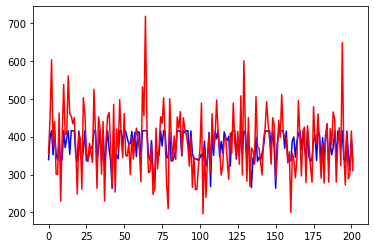

In [59]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)), y_pred, color='blue')
plt.plot(range(len(y_pred)), test_target, color='red')
plt.show()


In [60]:
from pandas import DataFrame
import csv
result = {'postcode': pt.index, 'rent': regr.predict(x)}
df = DataFrame(result)
print(df)

     postcode        rent
0      3143.0  415.991440
1      3054.0  415.991442
2      3052.0  415.991442
3      3067.0  415.991441
4      3008.0  415.991442
..        ...         ...
331    3844.0  415.603249
332    3677.0  415.603909
333    3820.0  415.596504
334    3280.0  415.600092
335    3689.0  415.599717

[336 rows x 2 columns]


In [62]:
df.describe()

,postcode,rent
count,336.000000,336.000000
mean,3265.598214,415.855974
std,268.676873,0.192147
min,3002.000000,415.540080
25%,3072.750000,415.593106
50%,3168.000000,415.991440
75%,3350.000000,415.991442
max,3977.000000,415.994775
